In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from lightgbm import LGBMClassifier,LGBMRegressor
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
data = pd.read_csv('sabermetricsHitter.csv')

In [5]:
data.fillna(0,inplace = True)

In [10]:
data['AB/HR'] = data['AB/HR'].replace(np.inf,0)

In [12]:
pacific = data[(data['チーム']=='l') | (data['チーム']=='m') | (data['チーム']=='e') | (data['チーム']=='h') | (data['チーム']=='f') | (data['チーム']=='b')]

In [14]:
central = data[(data['チーム']=='g') | (data['チーム']=='db') | (data['チーム']=='t') | (data['チーム']=='c') | (data['チーム']=='d') | (data['チーム']=='s')]

In [65]:
data=data[data['試合']>0]

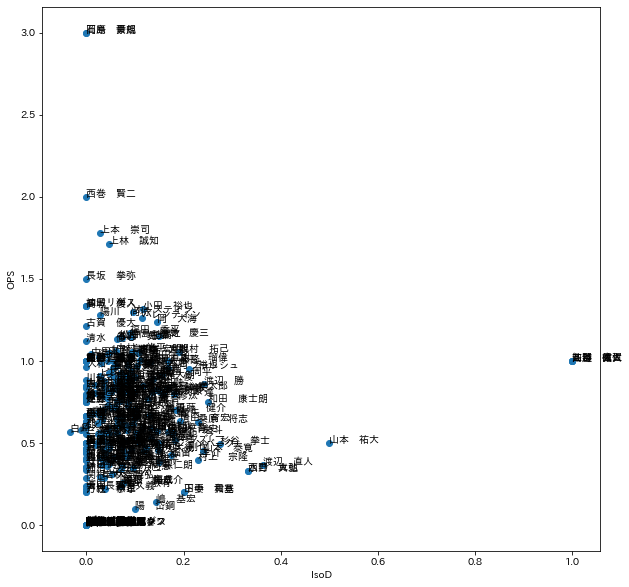

In [60]:
plt.figure(figsize=(10,10))
plt.scatter(data['IsoD'],data['OPS'])
plt.xlabel('IsoD')
plt.ylabel('OPS')
for x,y,name in zip(data['IsoD'],data['OPS'],data['選手']):
    plt.text(x,y,name)

In [66]:
data_group=data.groupby('チーム')

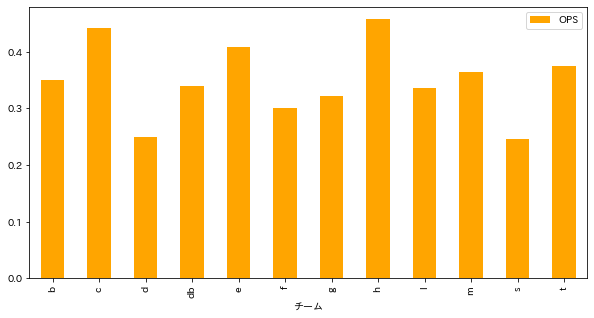

In [67]:
data_group[['OPS']].mean().plot(kind='bar',figsize=(10,5),color='orange')
plt.savefig('OPS.png')

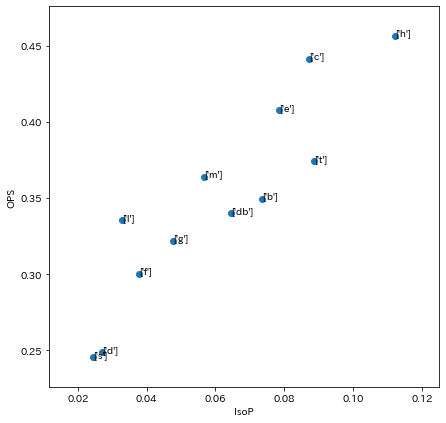

In [70]:
plt.figure(figsize=(7,7))
plt.scatter(x=data_group['IsoP'].mean(),y=data_group['OPS'].mean())
for x,y,name in zip(data_group['IsoP'].mean(),data_group['OPS'].mean(),data_group['チーム'].unique()):
    plt.text(x,y,name)
plt.xlabel('IsoP')
plt.ylabel('OPS')
plt.savefig('IsoPvsOPS.png')

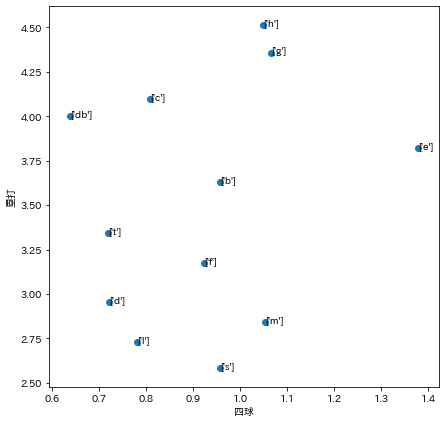

In [71]:
plt.figure(figsize=(7,7))
plt.scatter(x=data_group['四球'].mean(),y=data_group['塁打'].mean())
for x,y,name in zip(data_group['四球'].mean(),data_group['塁打'].mean(),data_group['チーム'].unique()):
    plt.text(x,y,name)
plt.xlabel('四球')
plt.ylabel('塁打')
plt.savefig('four_vs_slug.png')

In [49]:
plt.figure(figsize=(7,7))
plt.scatter(x=data_group['四球'].mean(),y=data_group['塁打'].mean())
for x,y,name in zip(data_group['四球'].mean(),data_group['塁打'].mean(),data_group['チーム'].unique()):
    plt.text(x,y,name)
plt.xlabel('四球')
plt.ylabel('塁打')
plt.savefig('four_vs_slug.png')

,試合,打席,打数,得点,安打,二塁打,三塁打,本塁打,塁打,打点,...,IsoP,IsoD,BB/K,BABIP,RC,RC27,AB/HR,PA/K,PS,Spd
チーム,,,,,,,,,,,,,,,,,,,,,
c,6.000000,10.809524,9.738095,1.404762,2.642857,0.595238,0.071429,0.238095,4.095238,1.309524,...,0.087310,0.024595,0.319643,0.185841,1.343200,inf,2.908730,inf,0.067460,1.605765
d,5.906977,10.674419,9.604651,0.790698,2.232558,0.395349,0.023256,0.093023,2.953488,0.744186,...,0.027023,0.026512,0.183850,0.116573,0.828979,0.979708,2.860465,inf,0.023256,0.996408
db,5.765957,10.297872,9.489362,1.191489,2.510638,0.574468,0.042553,0.276596,4.000000,1.127660,...,0.064638,0.052617,inf,0.129179,1.226412,inf,2.867021,inf,0.021277,2.427436
g,7.000000,13.177778,11.866667,1.222222,2.755556,0.400000,0.066667,0.355556,4.355556,1.155556,...,0.047822,0.032911,0.305364,0.139008,1.312577,1.936647,4.050000,inf,0.022222,1.380826
s,5.187500,10.083333,9.000000,0.791667,1.937500,0.333333,0.062500,0.062500,2.583333,0.750000,...,0.024354,0.031687,0.270213,0.122784,0.772413,1.234241,0.864583,inf,0.059524,1.313921
t,4.920000,9.020000,8.200000,0.980000,2.100000,0.340000,0.060000,0.260000,3.340000,0.940000,...,0.088660,0.038720,inf,0.141183,1.045179,inf,2.866667,inf,0.083333,2.892066


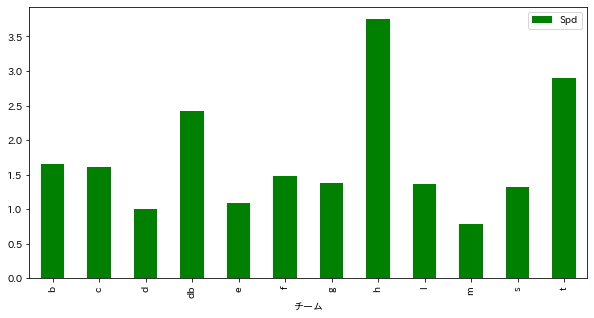

In [73]:
data_group[['Spd']].mean().plot(kind='bar',figsize=(10,5),color='green')
plt.savefig('Spd.png')